In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/olympics_dataset.csv')
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


# **Cleaning**

In [21]:
df.isnull().sum()

,0
player_id,0
Name,0
Sex,0
Team,0
NOC,0
Year,0
Season,0
City,0
Sport,0
Event,0


# **How has the number of medals awarded changed over the years?**

In [22]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [23]:
df['Medal_Numeric'] = df['Medal'].map({'No Medal': 0, 'Gold': 1, 'Silver': 2, 'Bronze': 3})


In [24]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,Medal_Numeric
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,NaN
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,NaN
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,NaN
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.0
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,NaN


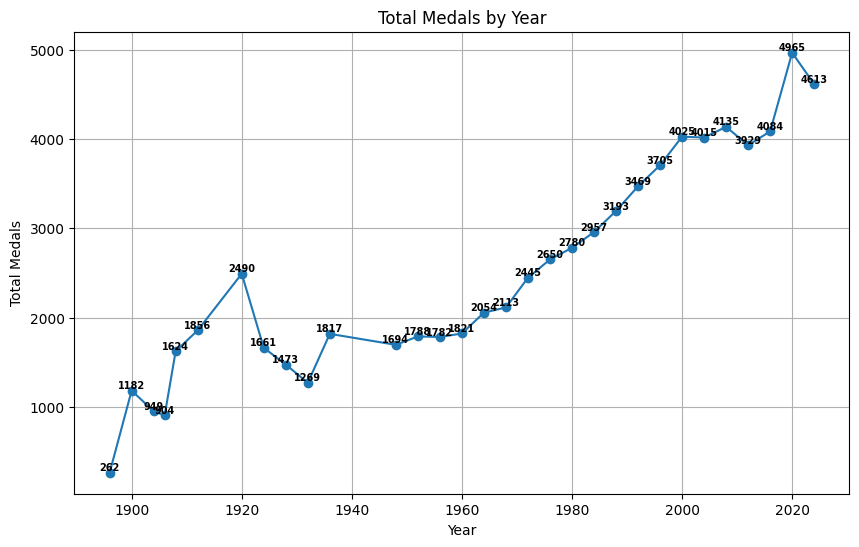

In [37]:
medals_by_year = df.groupby('Year')['Medal_Numeric'].sum()
ax = medals_by_year.plot(marker='o', grid=True, figsize=(10, 6))


plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Total Medals by Year')

for year, total_medals in medals_by_year.items():
    ax.text(year, total_medals, str(int(total_medals)), ha='center', va='bottom', fontsize = 7, fontweight= 'bold')

plt.show()

# **Are there any noticeable trends in medal distribution by season or sport?**

In [26]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,Medal_Numeric
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,NaN
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,NaN
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,NaN
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.0
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,NaN


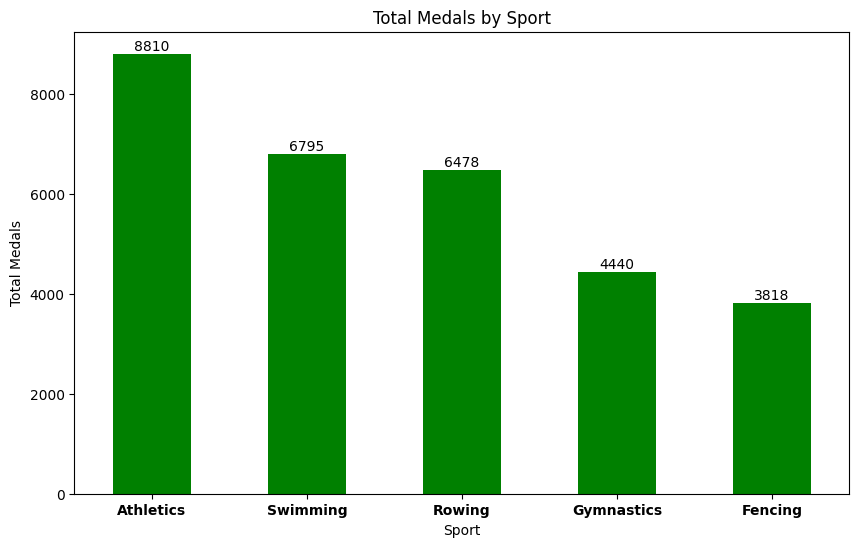

In [39]:
# Group by 'Sport' and sum the medals
medals_by_sport = df.groupby('Sport')['Medal_Numeric'].sum()

Sorting = medals_by_sport.sort_values(ascending=False).head(5)

ax = Sorting.plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('Sport')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel('Total Medals')
plt.title('Total Medals by Sport')
for i, value in enumerate(Sorting):
    ax.text(i, value + 10, str(int(value)), ha='center', va='bottom', fontsize=10)

plt.show()


# **Which countries have won the most medals overall, and how does this distribution vary by sport?**

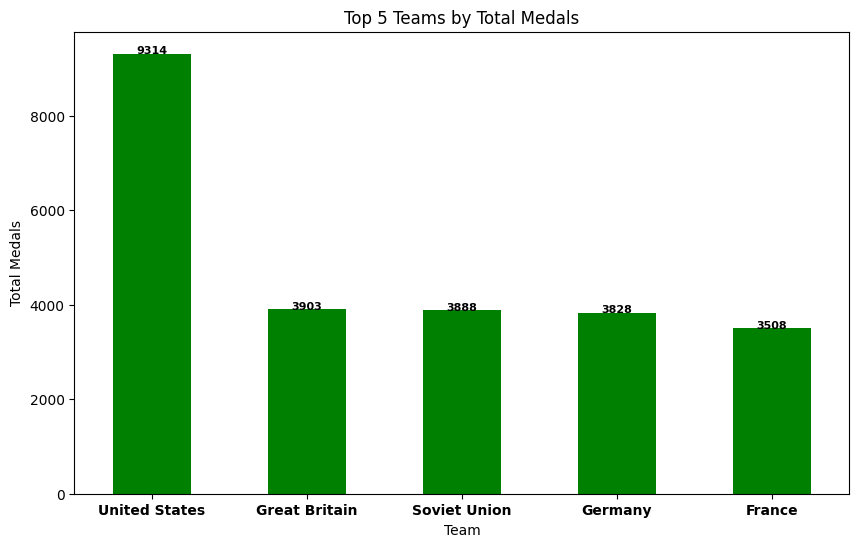

In [28]:
top_5_teams = df.groupby('Team')['Medal_Numeric'].sum().sort_values(ascending=False).head(5)

ax = top_5_teams.plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('Team')
plt.ylabel('Total Medals')
plt.title('Top 5 Teams by Total Medals')
plt.xticks(rotation=0,  fontweight='bold')

for i, total_medals in enumerate(top_5_teams):
      ax.text(i, total_medals + 1, str(int(total_medals)), ha='center', fontsize=8, fontweight='bold')

plt.show()

# **How does the performance of male and female athletes compare in terms of medal counts?**

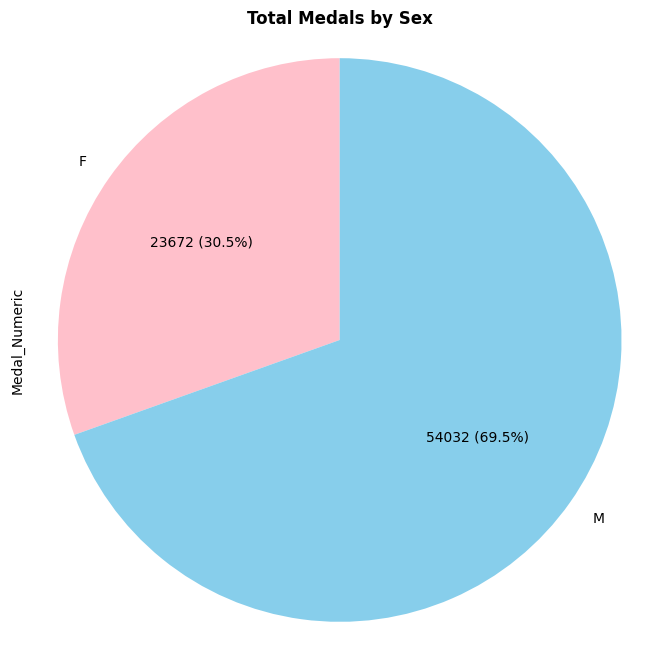

In [29]:
medals_by_sex = df.groupby('Sex')['Medal_Numeric'].sum()
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute} ({pct:.1f}%)'
ax = medals_by_sex.plot(kind='pie', figsize=(8, 8), autopct=lambda pct: func(pct, medals_by_sex), colors=['#FFC0CB', '#87CEEB'], startangle=90)
plt.title('Total Medals by Sex', fontweight='bold')
plt.axis('equal')
plt.show()

# **What are the most successful sports or events in terms of medal counts?**

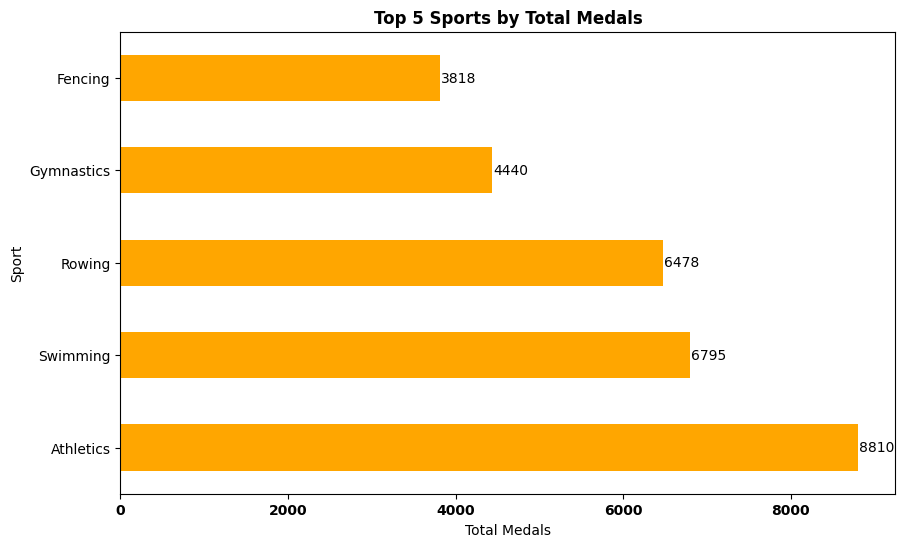

In [51]:

successful_sports = df.groupby('Sport')['Medal_Numeric'].sum().sort_values(ascending=False).head(5)

ax = successful_sports.plot(kind='barh', figsize=(10, 6), color='#ffa600')
plt.ylabel('Sport')
plt.xlabel('Total Medals')
plt.title('Top 5 Sports by Total Medals', fontweight='bold')
plt.xticks(fontweight='bold')
for i, value in enumerate(successful_sports):
    ax.text(value + 10, i, str(int(value)), va='center', fontsize=10)

plt.show()


# **How does the performance vary by city or host location?**

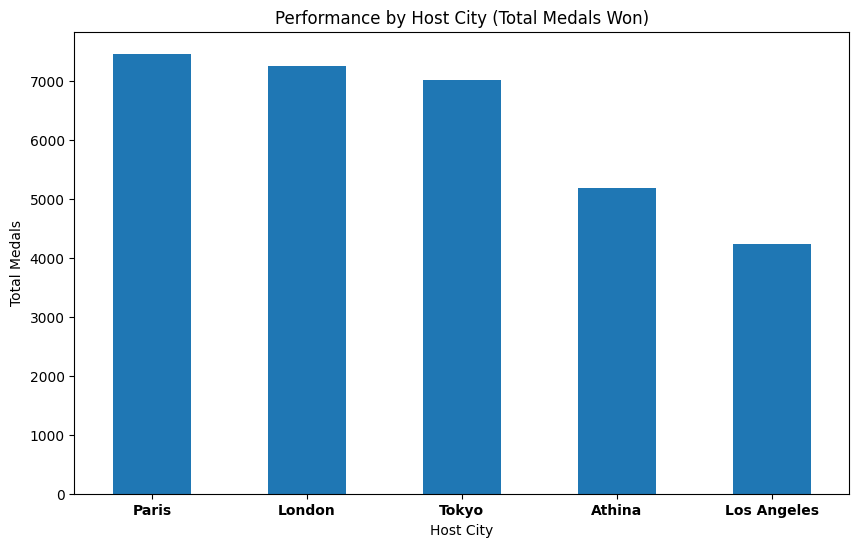

In [31]:
performance_by_city = df.groupby('City')['Medal_Numeric'].sum()

performance_by_city.sort_values(ascending=False).head(5).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Host City')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel('Total Medals')
plt.title('Performance by Host City (Total Medals Won)')
plt.show()

# **What are the historical medal counts by country and sport?**

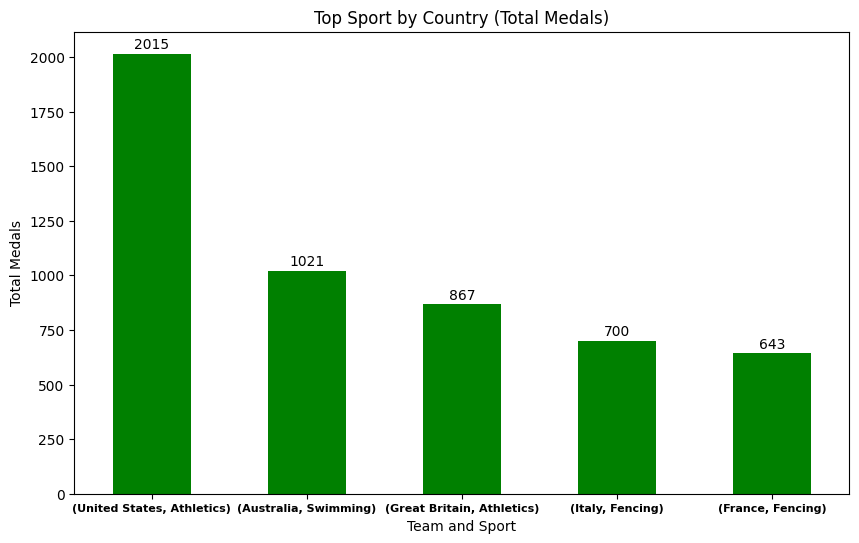

In [32]:
team_sport_medals = df.groupby(['Team', 'Sport'])['Medal_Numeric'].sum()
top_sport_per_team = team_sport_medals.groupby('Team').idxmax()

top_medal_counts = team_sport_medals.loc[top_sport_per_team].sort_values(ascending=False).head(5)

ax = top_medal_counts.plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('Team and Sport')
plt.ylabel('Total Medals')
plt.title('Top Sport by Country (Total Medals)')
plt.xticks(rotation=0, fontweight='bold', fontsize=8)
for i, value in enumerate(top_medal_counts):
    ax.text(i, value + 10, str(int(value)), ha='center', va='bottom', fontsize=10)

plt.show()


# **Are there any athletes with multiple medals across different events or years?**

In [33]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,Medal_Numeric
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,NaN
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,NaN
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,NaN
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.0
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,NaN


In [34]:
df.groupby(['Name', 'Event'])['Medal_Numeric'].sum().sort_values(ascending=False).head(5)

,,Medal_Numeric
Name,Event,
Mara Margalot,Hockey Women's Hockey,16.0
Aldo Montano,"Fencing Men's Sabre, Team",12.0
Robert Dover,"Equestrianism Mixed Dressage, Team",12.0
Tanya Harding,Softball Women's Softball,11.0
Theodora Grunsven,"Equestrianism Mixed Dressage, Team",11.0


# **Calculate the average number of medals won by each country.**

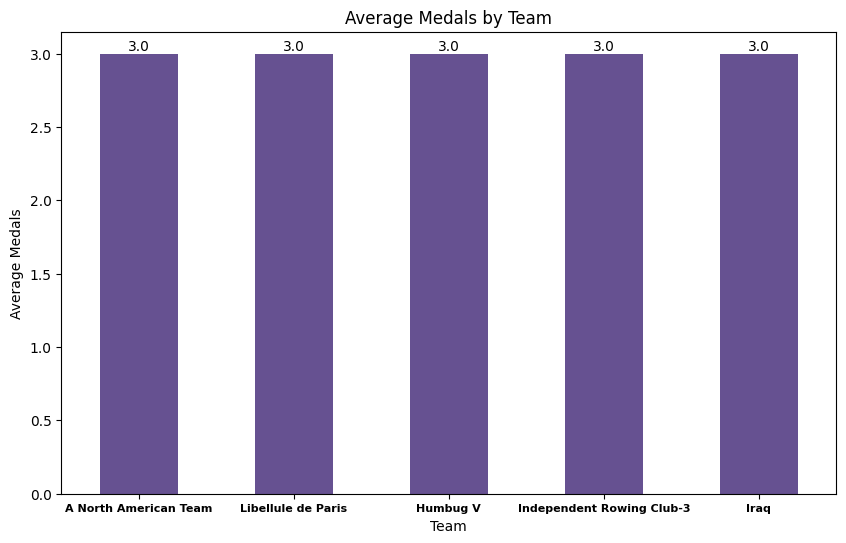

In [52]:
avg_medals = df.groupby('Team')['Medal_Numeric'].mean()
medals = avg_medals.sort_values(ascending=False).head(5)
medals.plot(kind='bar', figsize=(10, 6), color='#665191')
plt.xlabel('Team')
plt.ylabel('Average Medals')
plt.title('Average Medals by Team')
plt.xticks(rotation=0, fontweight='bold', fontsize=8)
for i, value in enumerate(medals):
    plt.text(i, value + 0.1, str(round(value, 2)), ha='center', va='top', fontsize=10)
plt.show()

# **Determine the standard deviation of medals won by athletes in different sports**

In [42]:
df.groupby('Sport')['Medal_Numeric'].std().sort_values(ascending=False).head(5)

,Medal_Numeric
Sport,
Jeu De Paume,1.000000
Roque,1.000000
Breaking,0.894427
Marathon Swimming,0.886405
Croquet,0.886405


# **Analyze the trend of gold medals won over the years**

In [44]:
medals_by_year = df[df['Medal'] == 'Gold'].groupby('Year')['Medal_Numeric'].count()
year_trends = np.diff(medals_by_year)

year_trends


array([ 139,  -28,  -16,  137,   32,  167, -216,  -32,  -16,   83,  -23,
         17,   -4,    7,   38,   12,   45,   34,   19,   40,   23,   39,
         49,   55,    1,    7,  -39,   33,  135,  -57])